#                             MATH 358 :                                                                 COMPUTATIONAL MATH PROJECT

##                                                 GROUP 3

##                                          IMAGE ROTATION

### WHAT IS IMAGE ROTATION?

It is a geometric transformation or an affine transformation(a transformation that preserves collinearity of some points, straight lines or planes). It deals with spinning an image about it centre by specified number of degrees without distorting the image but changing the angle from which it is viewed i.e in a clockwise or counter clockwise direction. Image rotation can be done through a forward or an inverse mapping.                              

Transformation function for the forward mapping;                                                                                                                                                                                 &nbsp;x, y = T(v, w)&nbsp; &nbsp; where x, y is the input pixel position and v, w is the output pixel position. Transformation function for the backward mapping; v, w = T(x, y)&nbsp;&nbsp;

 Each pixel has a coordinate pair(x, y) on two orthogonal axes from a defined origin O. It is around this origin that we do the rotation of the image. We take the values at every (x, y) location, rotate it as needed and then write these values in the new location considering (x, y) with respect to the origin we assumed. To assume this new location we use the rotation matrix.

When we rotate an image with a rotation matrix, the new image&nbsp; rows and columns go to floating point values because of the sine and cosine operations. We have to truncate the floating point values and do interpolations(the process of using known data values to estimate unknown data values) to predict data at missing image coordinate

Python has libraries which adds image processing capabilities to the python interpreter: it is like a module that manipulates and work with images by an input to the function. These libraries include Open CV, Numpy, Matplotlib and Scipy and pillow, but our project was restricted to use matplotlib and numpy to help us appreciate how things work. Matplotlib creates static, animated and interactive visualization in python and Numpy adds support for large multidimensional arrays and matrices, along with a large collection of high level mathematical functions to operate on these arrays. We considered two methods of interpolation to rotate our image i.e nearest neighbor and bilinear method of interpolation.

##                              BILINEAR INTERPOLATION

Bilinear Interpolation is a resampling method that uses the distance weighted average of the four nearest pixel values to estimate a new pixel value.                                                                                                                                                                                                        Bilinear interpolation&nbsp;is a method for&nbsp;interpolating&nbsp;functions of two variables (e.g.,&nbsp;x&nbsp;and&nbsp;y) using repeated&nbsp;linear interpolation. It is usually applied to functions sampled on a 2D&nbsp;rectilinear grid, though it can be generalized to functions defined on the vertices of (a&nbsp;mesh&nbsp;of) arbitrary&nbsp;convex&nbsp;quadrilaterals.                                                                                                                                                          Bilinear interpolation is performed using linear interpolation first in one direction, and then again in the other direction. Although each step is linear in the sampled values and in the position, the interpolation as a whole is not linear but rather&nbsp;quadratic&nbsp;in the sample location.

##                NEAREST NEIGHBOUR INTERPOLATION

It is an interpolation algorithm which considers one pixel; the closest one to the interpolated point and assumes the intensity value of it. This algorithm selects the value of the nearest point yielding a piecewise interpolant. It is very simple to implement as compared to bilinear and bicubic interpolation. When rotating an image, you scan every pixel of the transformed image&nbsp; and by applying the inverse transformation, find the corresponding coordinates in the original image. Then applying nearest neighbor method, you round the coordinates and just copy the source pixel value to the destination. Considering this method, we rotated an angle using numpy in python.                                                                                                                                                                                                                              1.We loaded our image using PIL                                                                                                                                                                                                     2.Gave any user of the code the access to enter his/her preferred angle.                                                                                                                                     3.We converted the angle into radians&nbsp;Defined the the width and height of the image.                                                                                                        4.Applied the cos and the sin functions to find our new image.                                                                                                                                                  5.Defined new height and new width for our new dimension of the output since after rotation the dimension the original image changes

                                                                                                                                                         .

HERE ARE THE CODES FOR NEAREST NEIGHBOUR INTERPOLATION FOR IMAGE ROTATION

0.7071067811865476
0.7071067811865475
275
183


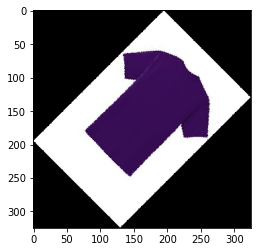

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

def shear(angle,x,y):            #|1 -tan((theta)/2)|  |1          0|     |1 -tan((theta)/2)|
    tangent = math.tan(angle/2)  #|0               1|  |sin(theta) 1|     |0               1|
    new_x=round(x-y*tangent)
    new_y=y

    new_y=round(new_x*math.sin(angle)+new_y)

    new_x=round(new_x-new_y*tangent)

    return new_y,new_x

img = Image.open('PROJECT PURPLE.jpg')
I_ARRAY=np.array(img)

angle=int(input('Enter the value of the angle'))

angle = math.radians(angle)    #converting angle into radians
angle
cosine = math.cos(angle)
print(cosine)
sine = math.sin(angle)
print(sine)
height = I_ARRAY.shape[0]      #define the height and width ofthe image
print(height)
width = I_ARRAY.shape[1]
print(width)

NEW_HEIGHT = round(abs(I_ARRAY.shape[0]*cosine)+abs(I_ARRAY.shape[1]*sine))+1   #define a new dimension of the image.
NEW_HEIGHT
NEW_WIDTH = round(abs(I_ARRAY.shape[1]*cosine)+abs(I_ARRAY.shape[0]*sine))+1
NEW_WIDTH
OUTPUT=np.zeros((NEW_HEIGHT, NEW_WIDTH,I_ARRAY.shape[2]))  #define a new dimension of the image filled with zeros.

original_centre_height = round(((I_ARRAY.shape[0]+1)/2)-1)    #finding the centre of the original image
original_centre_height
original_centre_width = round(((I_ARRAY.shape[1]+1)/2)-1)
original_centre_width

new_centre_height = round(((NEW_HEIGHT+1)/2)-1)      #finding the centre of the new image to be obtained
new_centre_height
new_centre_width = round(((NEW_WIDTH+1)/2)-1)
new_centre_width

for i in range(height):
    for j in range(width):   #assigning the coordinates of our pixels with respect to the centre.
        y=I_ARRAY.shape[0]-1-i-original_centre_height
        x=I_ARRAY.shape[1]-1-j-original_centre_width

        new_y,new_x=shear(angle,x,y)      #We applied a transformation(shear)

        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x

        OUTPUT[new_y,new_x,:]=I_ARRAY[i,j,:]   #new destination of our pixels in the output image.
        

pil_image=Image.fromarray((OUTPUT).astype(np.uint8))      #We converted our array into an image.
pil_image
plt.imshow(pil_image)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e838953-af84-41c0-a42f-feb686c0555a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>